In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers import concatenate
from keras.optimizers import Adam, SGD
from keras.regularizers import l1, l2
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix


In [2]:
train_dir = "train" #passing the path with training images
test_dir = "test"   #passing the path with testing images

In [3]:
img_size = 48

In [4]:
train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [5]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [6]:
def FER_Model(input_shape=(48,48,1)):
    # first input model
    visible = Input(shape=input_shape, name='input')
    num_classes = 7
    #the 1-st block
    conv1_1 = Conv2D(64, kernel_size=3, activation='relu', padding='same', name = 'conv1_1')(visible)
    conv1_1 = BatchNormalization()(conv1_1)
    conv1_2 = Conv2D(64, kernel_size=3, activation='relu', padding='same', name = 'conv1_2')(conv1_1)
    conv1_2 = BatchNormalization()(conv1_2)
    pool1_1 = MaxPooling2D(pool_size=(2,2), name = 'pool1_1')(conv1_2)
    drop1_1 = Dropout(0.3, name = 'drop1_1')(pool1_1)
    #the 2-nd block
    conv2_1 = Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_1')(drop1_1)
    conv2_1 = BatchNormalization()(conv2_1)
    conv2_2 = Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_2')(conv2_1)
    conv2_2 = BatchNormalization()(conv2_2)
    conv2_3 = Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_3')(conv2_2)
    conv2_2 = BatchNormalization()(conv2_3)
    pool2_1 = MaxPooling2D(pool_size=(2,2), name = 'pool2_1')(conv2_3)
    drop2_1 = Dropout(0.3, name = 'drop2_1')(pool2_1) 
    #the 3-rd block
    conv3_1 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_1')(drop2_1)
    conv3_1 = BatchNormalization()(conv3_1)
    conv3_2 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_2')(conv3_1)
    conv3_2 = BatchNormalization()(conv3_2)
    conv3_3 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_3')(conv3_2)
    conv3_3 = BatchNormalization()(conv3_3)
    conv3_4 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_4')(conv3_3)
    conv3_4 = BatchNormalization()(conv3_4)
    pool3_1 = MaxPooling2D(pool_size=(2,2), name = 'pool3_1')(conv3_4)
    drop3_1 = Dropout(0.3, name = 'drop3_1')(pool3_1)
    #the 4-th block
    conv4_1 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_1')(drop3_1)
    conv4_1 = BatchNormalization()(conv4_1)
    conv4_2 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_2')(conv4_1)
    conv4_2 = BatchNormalization()(conv4_2)
    conv4_3 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_3')(conv4_2)
    conv4_3 = BatchNormalization()(conv4_3)
    conv4_4 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_4')(conv4_3)
    conv4_4 = BatchNormalization()(conv4_4)
    pool4_1 = MaxPooling2D(pool_size=(2,2), name = 'pool4_1')(conv4_4)
    drop4_1 = Dropout(0.3, name = 'drop4_1')(pool4_1)
    #the 5-th block
    conv5_1 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_1')(drop4_1)
    conv5_1 = BatchNormalization()(conv5_1)
    conv5_2 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_2')(conv5_1)
    conv5_2 = BatchNormalization()(conv5_2)
    conv5_3 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_3')(conv5_2)
    conv5_3 = BatchNormalization()(conv5_3)
    conv5_4 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_4')(conv5_3)
    conv5_4 = BatchNormalization()(conv5_4)
    pool5_1 = MaxPooling2D(pool_size=(2,2), name = 'pool5_1')(conv5_4)
    drop5_1 = Dropout(0.3, name = 'drop5_1')(pool5_1)#Flatten and output
    flatten = Flatten(name = 'flatten')(drop5_1)
    ouput = Dense(num_classes, activation='softmax', name = 'output')(flatten)# create model 
    model = Model(inputs =visible, outputs = ouput)
    # summary layers
    print(model.summary())
    
    return model

In [7]:
model = FER_Model()
opt = Adam(learning_rate=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 48, 48, 1)]       0         
                                                                 
 conv1_1 (Conv2D)            (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 conv1_2 (Conv2D)            (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 pool1_1 (MaxPooling2D)      (None, 24, 24, 64)        0     

In [34]:
epochs = 30
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/30


2023-12-27 08:46:24.232339: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


359/359 [==============================] - 497s 1s/step - loss: 1.5070 - accuracy: 0.4142 - val_loss: 1.4350 - val_accuracy: 0.4567
Epoch 2/30
359/359 [==============================] - 614s 2s/step - loss: 1.4527 - accuracy: 0.4356 - val_loss: 1.4001 - val_accuracy: 0.4763
Epoch 3/30
359/359 [==============================] - 680s 2s/step - loss: 1.4011 - accuracy: 0.4598 - val_loss: 1.3503 - val_accuracy: 0.4825
Epoch 4/30
359/359 [==============================] - 674s 2s/step - loss: 1.3534 - accuracy: 0.4817 - val_loss: 1.3214 - val_accuracy: 0.5063
Epoch 5/30
359/359 [==============================] - 721s 2s/step - loss: 1.3090 - accuracy: 0.4998 - val_loss: 1.2181 - val_accuracy: 0.5489
Epoch 6/30
359/359 [==============================] - 849s 2s/step - loss: 1.2690 - accuracy: 0.5137 - val_loss: 1.1785 - val_accuracy: 0.5398
Epoch 7/30
359/359 [==============================] - 845s 2s/step - loss: 1.2378 - accuracy: 0.5280 - val_loss: 1.1519 - val_accuracy: 0.5559
Epoch 8/30

In [35]:
model.save('first_contact.h5')

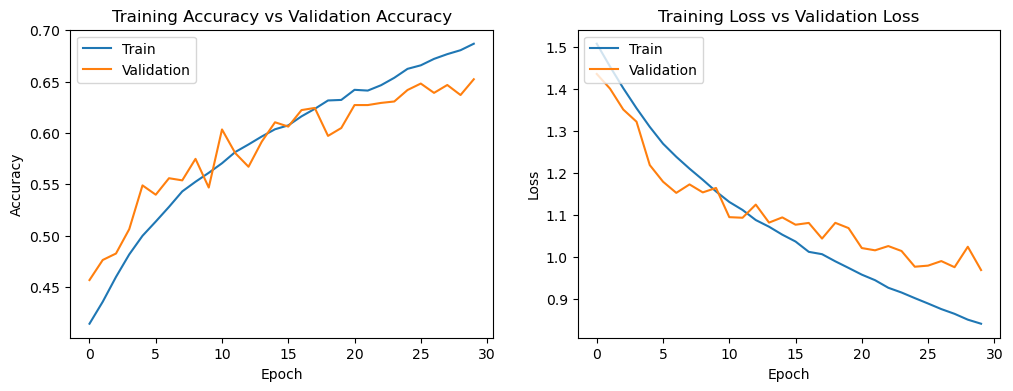

In [36]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [145]:
x=model.predict(validation_generator)

2023-12-28 16:25:17.095813: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


23/23 [==============================] - 6s 268ms/step


In [150]:
x

array([[4.1044211e-01, 1.6049510e-03, 6.7325294e-02, ..., 2.5345919e-01,
        2.6458159e-01, 1.8096579e-03],
       [2.8237942e-01, 7.3394593e-04, 4.6728384e-02, ..., 2.2569039e-01,
        4.4350809e-01, 7.7945320e-04],
       [2.8431696e-01, 5.0766561e-03, 1.4511757e-01, ..., 1.8853761e-01,
        3.6779350e-01, 8.3043287e-03],
       ...,
       [9.1692900e-06, 2.3072673e-08, 3.1334072e-04, ..., 5.8803907e-06,
        1.0412218e-05, 9.9965549e-01],
       [1.9891837e-01, 2.4618406e-03, 7.8485787e-02, ..., 7.1540996e-02,
        2.0338167e-01, 1.2470179e-02],
       [5.3845756e-02, 2.9068888e-04, 2.2953984e-01, ..., 3.9908800e-02,
        1.9061984e-02, 6.4249420e-01]], dtype=float32)

In [287]:
img=validation_generator[0][0][21]

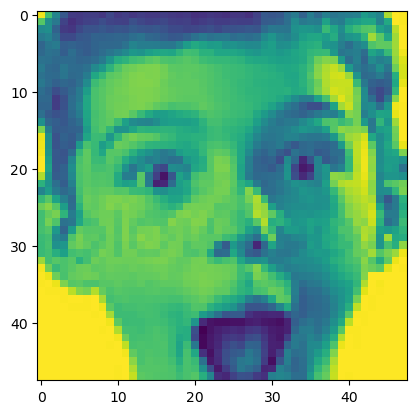

In [288]:
plt.imshow(img)

In [289]:
validation_generator[0][1][21]

array([0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [290]:
img = np.reshape(img, (1, 48, 48, 1))

In [291]:
prediction_array =model.predict(img)
prediction_array 

1/1 [==============================] - 0s 29ms/step


array([[1.2858253e-05, 1.1119552e-09, 3.9270608e-04, 2.3246063e-02,
        8.3250716e-06, 9.9330418e-07, 9.7633910e-01]], dtype=float32)

In [292]:


predicted_class = np.argmax(prediction_array)

print("Predicted class:", predicted_class)

Predicted class: 6


In [207]:
for layer in model.layers:
    print(layer.name, layer.output_shape)

input [(None, 48, 48, 1)]
conv1_1 (None, 48, 48, 64)
batch_normalization_17 (None, 48, 48, 64)
conv1_2 (None, 48, 48, 64)
batch_normalization_18 (None, 48, 48, 64)
pool1_1 (None, 24, 24, 64)
drop1_1 (None, 24, 24, 64)
conv2_1 (None, 24, 24, 128)
batch_normalization_19 (None, 24, 24, 128)
conv2_2 (None, 24, 24, 128)
batch_normalization_20 (None, 24, 24, 128)
conv2_3 (None, 24, 24, 128)
pool2_1 (None, 12, 12, 128)
drop2_1 (None, 12, 12, 128)
conv3_1 (None, 12, 12, 256)
batch_normalization_22 (None, 12, 12, 256)
conv3_2 (None, 12, 12, 256)
batch_normalization_23 (None, 12, 12, 256)
conv3_3 (None, 12, 12, 256)
batch_normalization_24 (None, 12, 12, 256)
conv3_4 (None, 12, 12, 256)
batch_normalization_25 (None, 12, 12, 256)
pool3_1 (None, 6, 6, 256)
drop3_1 (None, 6, 6, 256)
conv4_1 (None, 6, 6, 256)
batch_normalization_26 (None, 6, 6, 256)
conv4_2 (None, 6, 6, 256)
batch_normalization_27 (None, 6, 6, 256)
conv4_3 (None, 6, 6, 256)
batch_normalization_28 (None, 6, 6, 256)
conv4_4 (None, 6, 6

In [209]:
img.shape

(48, 48, 1)

In [254]:
epochs = 30
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/30


2023-12-28 18:34:35.253533: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


359/359 [==============================] - ETA: 0s - loss: 0.8245 - accuracy: 0.6913

2023-12-28 18:45:10.035089: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


359/359 [==============================] - 645s 2s/step - loss: 0.8245 - accuracy: 0.6913 - val_loss: 0.9769 - val_accuracy: 0.6425
Epoch 2/30
359/359 [==============================] - 689s 2s/step - loss: 0.8085 - accuracy: 0.6958 - val_loss: 1.0262 - val_accuracy: 0.6320
Epoch 3/30
359/359 [==============================] - 635s 2s/step - loss: 0.7964 - accuracy: 0.7038 - val_loss: 0.9700 - val_accuracy: 0.6676
Epoch 4/30
359/359 [==============================] - 695s 2s/step - loss: 0.7852 - accuracy: 0.7063 - val_loss: 1.1189 - val_accuracy: 0.6159
Epoch 5/30
359/359 [==============================] - 754s 2s/step - loss: 0.7698 - accuracy: 0.7102 - val_loss: 0.9990 - val_accuracy: 0.6390
Epoch 6/30
359/359 [==============================] - 685s 2s/step - loss: 0.7627 - accuracy: 0.7117 - val_loss: 1.0128 - val_accuracy: 0.6334
Epoch 7/30
359/359 [==============================] - 651s 2s/step - loss: 0.7443 - accuracy: 0.7220 - val_loss: 0.9954 - val_accuracy: 0.6669
Epoch 8/30

In [255]:
model.save('second_contact.h5')

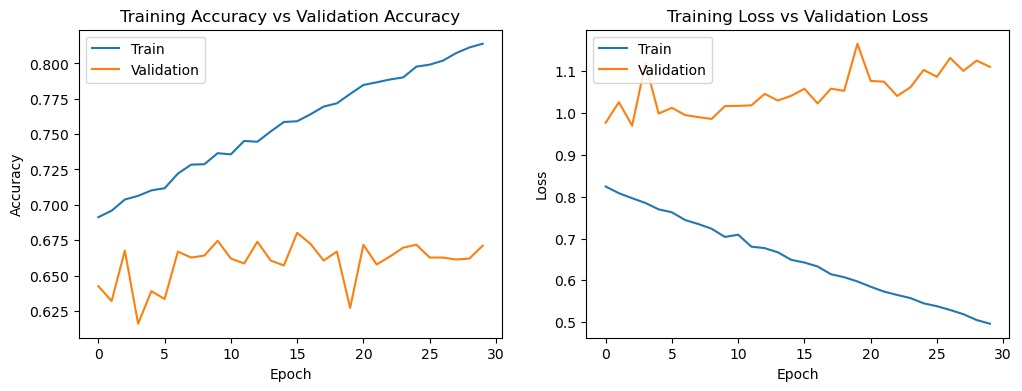

In [256]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [11]:
def FER1_Model(input_shape=(48,48,1)):
    # first input model
    visible = Input(shape=input_shape, name='input')
    num_classes = 7
    #the 1-st block
    conv1_1 = Conv2D(64, kernel_size=3, activation='relu', padding='same', name = 'conv1_1')(visible)
    conv1_1 = BatchNormalization()(conv1_1)
    conv1_2 = Conv2D(64, kernel_size=3, activation='relu', padding='same', name = 'conv1_2')(conv1_1)
    conv1_2 = BatchNormalization()(conv1_2)
    pool1_1 = MaxPooling2D(pool_size=(2,2), name = 'pool1_1')(conv1_2)
    drop1_1 = Dropout(0.3, name = 'drop1_1')(pool1_1)
    #the 2-nd block
    conv2_1 = Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_1')(drop1_1)
    conv2_1 = BatchNormalization()(conv2_1)
    conv2_2 = Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_2')(conv2_1)
    conv2_2 = BatchNormalization()(conv2_2)
    conv2_3 = Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_3')(conv2_2)
    conv2_2 = BatchNormalization()(conv2_3)
    pool2_1 = MaxPooling2D(pool_size=(2,2), name = 'pool2_1')(conv2_3)
    drop2_1 = Dropout(0.3, name = 'drop2_1')(pool2_1) 
    #the 3-rd block
    conv3_1 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_1')(drop2_1)
    conv3_1 = BatchNormalization()(conv3_1)
    conv3_2 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_2')(conv3_1)
    conv3_2 = BatchNormalization()(conv3_2)
    conv3_3 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_3')(conv3_2)
    conv3_3 = BatchNormalization()(conv3_3)
    conv3_4 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_4')(conv3_3)
    conv3_4 = BatchNormalization()(conv3_4)
    pool3_1 = MaxPooling2D(pool_size=(2,2), name = 'pool3_1')(conv3_4)
    drop3_1 = Dropout(0.3, name = 'drop3_1')(pool3_1)
    #the 4-th block
    conv4_1 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_1')(drop3_1)
    conv4_1 = BatchNormalization()(conv4_1)
    conv4_2 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_2')(conv4_1)
    conv4_2 = BatchNormalization()(conv4_2)
    conv4_3 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_3')(conv4_2)
    conv4_3 = BatchNormalization()(conv4_3)
    conv4_4 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_4')(conv4_3)
    conv4_4 = BatchNormalization()(conv4_4)
    pool4_1 = MaxPooling2D(pool_size=(2,2), name = 'pool4_1')(conv4_4)
    drop4_1 = Dropout(0.3, name = 'drop4_1')(pool4_1)
    #the 5-th block
    conv5_1 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_1')(drop4_1)
    conv5_1 = BatchNormalization()(conv5_1)
    conv5_2 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_2')(conv5_1)
    conv5_2 = BatchNormalization()(conv5_2)
    conv5_3 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_3')(conv5_2)
    conv5_3 = BatchNormalization()(conv5_3)
    conv5_4 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_4')(conv5_3)
    conv5_3 = BatchNormalization()(conv5_3)
    pool5_1 = MaxPooling2D(pool_size=(2,2), name = 'pool5_1')(conv5_4)
    drop5_1 = Dropout(0.3, name = 'drop5_1')(pool5_1)#Flatten and output
     #the 5-th block
    conv6_1 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv6_1')(drop5_1)
    conv6_1 = BatchNormalization()(conv5_1)
    conv6_2 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv6_2')(conv6_1)
    conv6_2 = BatchNormalization()(conv5_2)
    conv6_3 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv6_3')(conv6_2)
    conv6_3 = BatchNormalization()(conv5_3)
    conv6_4 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv6_4')(conv6_3)
    conv6_4 = BatchNormalization()(conv6_4)
    pool6_1 = MaxPooling2D(pool_size=(2,2), name = 'pool6_1')(conv6_4)
    drop6_1 = Dropout(0.3, name = 'drop6_1')(pool6_1)#Flatten and output
    flatten = Flatten(name = 'flatten')(drop6_1)
    ouput = Dense(num_classes, activation='softmax', name = 'output')(flatten)# create model 
    model = Model(inputs =visible, outputs = ouput)
    # summary layers
    print(model.summary())
    
    return model

In [12]:
model1 = FER1_Model()
opt = Adam(learning_rate=0.0001, decay=1e-6)
model1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 48, 48, 1)]       0         
                                                                 
 conv1_1 (Conv2D)            (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_38 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 conv1_2 (Conv2D)            (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_39 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 pool1_1 (MaxPooling2D)      (None, 24, 24, 64)        0   

In [ ]:
epochs = 60
history1 = model1.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/60


2024-01-24 10:25:00.704794: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


359/359 [==============================] - ETA: 0s - loss: 2.4722 - accuracy: 0.2051

2024-01-24 10:33:46.509155: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


359/359 [==============================] - 536s 1s/step - loss: 2.4722 - accuracy: 0.2051 - val_loss: 1.8650 - val_accuracy: 0.2291
Epoch 2/60
359/359 [==============================] - 578s 2s/step - loss: 1.8867 - accuracy: 0.2426 - val_loss: 1.8261 - val_accuracy: 0.2493
Epoch 3/60
359/359 [==============================] - 591s 2s/step - loss: 1.8015 - accuracy: 0.2554 - val_loss: 1.8197 - val_accuracy: 0.2619
Epoch 4/60
359/359 [==============================] - 4749s 13s/step - loss: 1.7638 - accuracy: 0.2761 - val_loss: 1.7718 - val_accuracy: 0.2961
Epoch 5/60
171/359 [=============>................] - ETA: 1:52:43 - loss: 1.7278 - accuracy: 0.2955